In [1]:
!pip install gymnasium matplotlib numpy

In [48]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


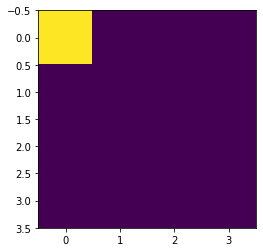

<IPython.core.display.Javascript object>

In [49]:
output_grid = widgets.Grid(1, 1)
# On each iteration, a different cell is lit up
for i in range(5):
  # 3 by 3 grid of zeros
  grid = np.zeros((4, 4))
  # One box in random has value 1
  grid[np.random.randint(4), np.random.randint(4)] = 1

  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    print(grid)
    plt.imshow(grid)
  time.sleep(1)

In [50]:
x = print(spaces.Discrete(9))
type(x)

Discrete(9)


NoneType

In [62]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self):

        # How much of the environment is visible to the agent
        self.observation_space = spaces.Discrete(16)
        # No of directions the agent can move in
        self.action_space = spaces.Discrete(8)
        # Maximum steps before we end the episode 
        self.max_timesteps = 12

        # Init timestep to 0
        self.timestep = 0
        # Agent starts at the first box
        self.agent_pos = [0, 0]
        # Terminal position is bottom right square
        self.goal_pos = [3, 3]
        self.state = np.zeros((4,4))

        # These two values just to show the agent's pos and terminal state in the plot
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        
    def reset(self, **kwargs):
        # Reset timesteps
        self.timestep = 0
        # Resetting the state
        self.state = np.zeros((4,4))
        # Note that I'm not resetting the position of the agent. Might be needed
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        # TODO: Am I sending the right observation back?
        observation = self.state.flatten()
        
        # What's the point of info?
        info = {}
        print("OBSERVATION IN RESET:\n",observation)
        return observation, info
    
    def step(self, action, prob):
        rand = np.random.random()
        # if prob is not 1, then there's a 1-prob chance of picking a random action
        if rand > prob:
          # Generate a number between 0 and action_space(8)
          old_action = action
          action = np.random.randint(0, self.action_space.n)
          print("ACTION INTENDED VS TAKEN", old_action, action)

        # 8 possible actions in all directions
        if action == 0:
          # Move right
          self.agent_pos[1] += 1
        if action == 1:
          # Move down-right
          self.agent_pos[0] += 1
          self.agent_pos[1] += 1
        if action == 2:
          # Move down
          self.agent_pos[0] += 1
        if action == 3:
          # Move down-left
          self.agent_pos[0] += 1
          self.agent_pos[1] -= 1
        if action == 4:
          # Move left
          self.agent_pos[1] -= 1
        if action == 5:
          # Move up-left
          self.agent_pos[0] -= 1
          self.agent_pos[1] -= 1
        if action == 6:
          # Move up
          self.agent_pos[0] -= 1
        if action == 7:
          # Move up-right
          self.agent_pos[0] -= 1
          self.agent_pos[1] += 1

        # Comment this to demonstrate the truncation condition.
        # TODO: Make this wrap-around
        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        observation = self.state.flatten()
        
        reward = 0
        # If the agent reached the goal, reward is 10
        if np.array_equal(self.agent_pos, self.goal_pos):
          reward = 10

        # Increment timestep
        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps else False
        truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 3)) else False

        info = {}
        
        return observation, reward, terminated, truncated, info
        
    def render(self):
        print("RENDER STATE \n",self.state)
        plt.imshow(self.state)

In [63]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    # We are randomly picking an action out of the available actions(0-7)
    return np.random.choice(self.action_space.n)

RENDER STATE 
 [[1.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]


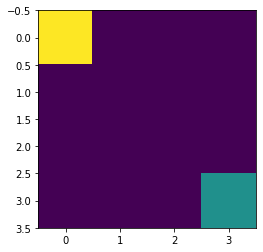

In [64]:
env = GridEnvironment()
agent = RandomAgent(env)
agent.env.render()

OBSERVATION IN RESET:
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.5]


""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ACTION INTENDED VS TAKEN 6 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ACTION INTENDED VS TAKEN 4 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ACTION INTENDED VS TAKEN 3 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RENDER STATE 
 [[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]
REWARD, OBS: 
 10 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
TOTAL REWARD: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10] True


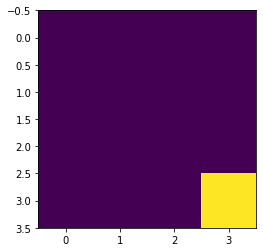

<IPython.core.display.Javascript object>

In [67]:
obs, info = env.reset()
terminated, truncated = False, False
rewards = []
# prob 1 for deterministic, anything else between [0-1) for stochastic
prob = 0.9

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

while not terminated:
  action = agent.step(obs)
  obs, reward, terminated, truncated, info = env.step(action, prob)
  rewards.append(reward)
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    env.render()
    print("REWARD, OBS: \n", reward, obs)
    print("TOTAL REWARD: \n", rewards, terminated)
  time.sleep(2)


In [31]:
x = spaces.Discrete(8)


In [32]:
x.n

8

In [47]:
np.random.randint(0,x.n)

5